# lifelogging-device-datamining (1) 

## 💻 Preliminary Steps

> Background of Data : From 2019.01.01. to 2021.03.11 (800 days), a company specializing in IoT devices has developed several sensors to collect everyday activities of 67 users for lifelogging; small sensors (tags) are installed in the house of elderly citizens who live alone, collecting various data using smartphones and smartwatches. 

> Goal: Based on the lifelogging record, **construct an automated service to support elderly citizens.** 

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 0. Data Loading

In [52]:
uplink = pd.read_csv('./device_uplink.csv')
uplink = uplink.drop(['Unnamed: 0'], axis=1)
uplink.shape # find the dimension of data frame

(324823, 8)

In [53]:
uplink.head() # show the first five rows

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
0,3087926,505,1970-01-01 00:00:00,20.0,4060,36,0,0
1,1829810,506,1970-01-01 00:00:00,19.0,5049,65,0,0
2,3085988,512,1970-01-01 00:00:00,19.0,2682,65,0,0
3,1827965,674,1970-01-01 00:00:00,20.0,2541,19,0,0
4,889419,544,1970-01-01 00:00:00,NaN,15244,86,0,0


In [54]:
print(uplink) # show all the data

        uplink_id  owner_id          client_time  tag_id   step  battery_low  \
0         3087926       505  1970-01-01 00:00:00    20.0   4060           36   
1         1829810       506  1970-01-01 00:00:00    19.0   5049           65   
2         3085988       512  1970-01-01 00:00:00    19.0   2682           65   
3         1827965       674  1970-01-01 00:00:00    20.0   2541           19   
4          889419       544  1970-01-01 00:00:00     NaN  15244           86   
...           ...       ...                  ...     ...    ...          ...   
324818    3771890       532  2021-03-11 16:04:20    10.0   2817            3   
324819    3771892       532  2021-03-11 16:04:30    10.0   2826            2   
324820    3771899       635  2021-03-11 16:05:18     2.0   6988           54   
324821    3771901       504  2021-03-11 16:05:35     2.0   9687           89   
324822    3771903       505  2021-03-11 16:05:40     9.0   7177           35   

        is_charge  tag_battery_low  
0 

## 1. Sampling 

#### 1-1. What Sampling method do I choose?
Sampling can be used to save resources, but it can also be used to explore smaller datasets. Some characteristics appear when examining the data as a whole, while some characteristics are more obvious for subsets of the dataset. 

In this case, the number of `tag_id 0` is 166034 which is extremely large compared to other tag_ids. So I would attach more importance to to `tag_id 1`~`tag_id 20` rather than `tag_id 0`. Therefore, **I select oversampling method rather than random sampling methods.**

In [55]:
uplink['tag_id'].value_counts()

0.0     166034
10.0     74711
2.0      29891
9.0      19256
1.0      12034
12.0      9002
11.0      2983
6.0       2690
3.0       2580
7.0       1875
20.0      1206
19.0       804
4.0        223
8.0        207
5.0        121
Name: tag_id, dtype: int64

In [56]:
# oversample the data whose tag_id is over 0
weights = [0.9 if 1<=tag_id<=20 else 0.01 for tag_id in uplink.tag_id]
uplink.sample(10, weights = weights)

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
135457,1658201,670,2020-10-20 14:42:10,10.0,4127,61,0,0
309382,3579327,665,2021-02-26 12:44:05,2.0,6622,24,0,0
89076,1313296,524,2020-09-30 16:23:25,10.0,6077,44,0,0
299788,3483020,230,2021-02-19 10:29:32,10.0,6847,50,0,0
43504,885427,524,2020-08-31 12:16:17,2.0,4398,31,0,0
186189,2061058,536,2020-11-14 18:13:13,9.0,3492,72,0,1
15479,530624,547,2020-08-06 14:37:38,10.0,153,87,0,0
216327,2334905,669,2020-12-02 13:27:46,1.0,1488,89,0,1
130017,1622298,492,2020-10-18 10:11:26,10.0,7616,83,0,0
152398,1776551,524,2020-10-28 12:45:37,10.0,1647,29,0,0


#### 1-2. Data type 
What type of data should be for each attribute ?
- `uplink_id`, `owner_id`, `tag_id` represent id number. Their data type is **numeric type**.
- `client_time` represents date. Their data type is **numeric type (date)**.
- `step`, `battery_level` represent the amount of steps/battery. Their data type is **numeric type**.
- `is_charge`, `tag_battery_low` are dummy variables that take values of 0 and 1. Their data type is **categorical type coded as numerical(0,1)**.

In [57]:
# Reviewing variables in pandas
uplink.columns # print a list of variables

Index(['uplink_id', 'owner_id', 'client_time', 'tag_id', 'step', 'battery_low',
       'is_charge', 'tag_battery_low'],
      dtype='object')

In [58]:
uplink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324823 entries, 0 to 324822
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uplink_id        324823 non-null  int64  
 1   owner_id         324823 non-null  int64  
 2   client_time      324823 non-null  object 
 3   tag_id           323617 non-null  float64
 4   step             324823 non-null  int64  
 5   battery_low      324823 non-null  int64  
 6   is_charge        324823 non-null  int64  
 7   tag_battery_low  324823 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 19.8+ MB


In [59]:
uplink.client_time.dtype # (Python) objects

dtype('O')

In [60]:
uplink['client_time'] = pd.to_datetime(uplink['client_time'], format='%Y-%m-%d') #convert data type in Dataframe
uplink.client_time.dtype

dtype('<M8[ns]')

## 2. Handle Missing Value

#### 2-1. Where are the missing values?
When processing missing values(NA), it is necessary to understand the relationship between the variable and the dependent variable and decide whether to replace or remove them. After check the number of missing values using `uplink.isnull().sum()`, `tag_id` has 1206 missing values. 

In [61]:
uplink.isnull().sum()

uplink_id             0
owner_id              0
client_time           0
tag_id             1206
step                  0
battery_low           0
is_charge             0
tag_battery_low       0
dtype: int64

#### 2-2. How should we handle this missing value (1) ?
How should we handle this missing value in the tag_id category? 

According to the data description, we notice that the range of `tag_id` is 1~20. However, in the given data now we have, it was found that `tag_id` had data from 0 to 20. So, before we handle the missing value, we need to find what `tag_id 0` means. Here is the process I went through.

Before finding the meaning of the data with `tag_id 0`, it was necessary to grasp the meaning of the overall data. First of all, uplink_id is an ID related to the movement dataset, so it must be a unique value, so there should be no duplicate value. However, when we looked at the data, we found that there was a duplicate value in the `uplink_id` column. As a result of outputting the duplicate value in the `uplink_id` column, it was confirmed that for the same movement, there are duplicate: **one is the data with `tag_id 1~20`, another is data with `tag_id 0`**. Therefore, when there is a duplicate value, it may be determined that **a value of tag_id 0 is incorrectly measured** due to an error and deleted. (There is still a duplicate value in uplink_id, but we will check again after the preprocessing process to see if there is any duplicate value in uplink_id.)

To sum up, `uplink_id` should be unique id but some data exist in duplicate. Therefore, as long as it exists in duplicate, a value of `tag_id 0` should be deleted.

In [62]:
duplicateDF = uplink[uplink.duplicated('uplink_id',keep=False)]
duplicateDF.sort_values(by=["uplink_id", "tag_id"]).head(10)

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
57,50799,230,2019-12-02 11:09:58,0.0,448,98,0,0
58,50799,230,2019-12-02 11:09:58,20.0,448,98,0,0
85,51259,230,2019-12-02 16:39:59,0.0,9659,81,0,0
86,51259,230,2019-12-02 16:39:59,20.0,9659,81,0,0
287,59692,232,2019-12-09 17:10:04,0.0,4056,23,0,0
286,59692,232,2019-12-09 17:10:04,NaN,4056,23,0,0
321,63356,232,2019-12-13 16:10:02,0.0,3782,88,0,0
322,63356,232,2019-12-13 16:10:02,NaN,3782,88,0,0
366,64549,232,2019-12-15 07:30:02,0.0,171,55,0,0
367,64549,232,2019-12-15 07:30:02,NaN,171,55,0,0


In [63]:
uplink[uplink['tag_id'] == 0.0].shape[0]  #166034 rows 

166034

In [64]:
#when uplink_id is in duplicate, it may be determined that a value of tag_id 0 is incorrectly measured due to an error and deleted.
uplink = uplink.drop(duplicateDF[duplicateDF['tag_id'] == 0.0].index)
uplink[uplink['tag_id'] == 0.0].shape[0]  #164367 rows 

164367

In [65]:
uplink[uplink.duplicated('uplink_id',keep=False)].sort_values(by=["uplink_id", "tag_id"])

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
380,68312,232,2019-12-21 11:38:38,9.0,1135,96,0,1
379,68312,232,2019-12-21 11:38:38,19.0,1135,96,0,1
1028,123469,230,2020-02-14 08:03:43,7.0,371,71,0,0
1027,123469,230,2020-02-14 08:03:43,20.0,371,71,0,0
1166,125772,230,2020-02-16 10:51:35,7.0,5635,33,0,0
...,...,...,...,...,...,...,...,...
324082,3767286,230,2021-03-11 10:37:54,NaN,6440,44,0,0
324114,3767364,230,2021-03-11 10:41:11,10.0,6835,44,0,0
324112,3767364,230,2021-03-11 10:41:11,NaN,6835,44,0,0
324313,3768360,665,2021-03-11 11:56:00,2.0,5325,38,0,0


In [66]:
uplink['tag_id'].value_counts()

0.0     164367
10.0     74711
2.0      29891
9.0      19256
1.0      12034
12.0      9002
11.0      2983
6.0       2690
3.0       2580
7.0       1875
20.0      1206
19.0       804
4.0        223
8.0        207
5.0        121
Name: tag_id, dtype: int64

In [67]:
uplink['tag_id'].min()

0.0

In [68]:
uplink['tag_id'].max()

20.0

#### 2-2. How should we handle this missing value (2) ?

We can conclude `tag_id 0` means no tagging sensors were activated. Since **both missing value in `tag_id` and `tag_id 0` are data when the tag sensor is not activated and data that is not classified into any `tag_id`, the missing value can eventually be replaced with `tag_id 0`**. Therefore, we can allocate the missing value as `tag_id 0`. In other words, since the missing value is the value when the tag sensor is not detected, it can be regarded as the same data as `tag_id 0`. Then, when there is a duplicate value in `uplink_id`, it may be determined that a value of NA is incorrectly measured because `uplink_id` should be unique id. 

Now, we make tag_id 0 to a case where **the data was collected even though the tag device was not taken anywhere.**
Doing this, we may not lose the information contained in this record during the analysis process. (And, We can then identify the time interval by examining the time interval that does not contain tag ID information.)

In [69]:
#fill NA with 0
uplink.tag_id = uplink.tag_id.fillna(value=0)

In [70]:
uplink.isnull().sum()

uplink_id          0
owner_id           0
client_time        0
tag_id             0
step               0
battery_low        0
is_charge          0
tag_battery_low    0
dtype: int64

In [71]:
duplicateDF2 = uplink[uplink.duplicated('uplink_id',keep=False)].sort_values(by=["uplink_id", "tag_id"])
duplicateDF2

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
380,68312,232,2019-12-21 11:38:38,9.0,1135,96,0,1
379,68312,232,2019-12-21 11:38:38,19.0,1135,96,0,1
1028,123469,230,2020-02-14 08:03:43,7.0,371,71,0,0
1027,123469,230,2020-02-14 08:03:43,20.0,371,71,0,0
1166,125772,230,2020-02-16 10:51:35,7.0,5635,33,0,0
...,...,...,...,...,...,...,...,...
324083,3767286,230,2021-03-11 10:37:54,10.0,6440,44,0,0
324112,3767364,230,2021-03-11 10:41:11,0.0,6835,44,0,0
324114,3767364,230,2021-03-11 10:41:11,10.0,6835,44,0,0
324312,3768360,665,2021-03-11 11:56:00,0.0,5325,38,0,0


In [72]:
#If there is a duplicate data in uplink_id, remove tag_id 0 because uplink_id should be unique id.
uplink = uplink.drop(duplicateDF2[duplicateDF2['tag_id'] == 0.0].index)
uplink[uplink.duplicated('uplink_id',keep=False)].sort_values(by=["uplink_id", "tag_id"])

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
380,68312,232,2019-12-21 11:38:38,9.0,1135,96,0,1
379,68312,232,2019-12-21 11:38:38,19.0,1135,96,0,1
1028,123469,230,2020-02-14 08:03:43,7.0,371,71,0,0
1027,123469,230,2020-02-14 08:03:43,20.0,371,71,0,0
1166,125772,230,2020-02-16 10:51:35,7.0,5635,33,0,0
...,...,...,...,...,...,...,...,...
323478,3759496,501,2021-03-10 18:20:59,19.0,9564,68,0,0
323551,3760222,505,2021-03-10 19:34:51,9.0,8249,75,0,0
323552,3760222,505,2021-03-10 19:34:51,19.0,8249,75,0,0
323934,3766582,230,2021-03-11 09:36:48,10.0,3807,45,0,0


## 3. Handle Outliers

#### 3-1. Tag_id

We already checked there is `tag_id 0` data and looked at the meaning of it above. After preprocessing, `tag_id 0` means a case where the data was collected even though no sensor was detected. 

Therefore, tag_id 0 can be seen as an outlier because the range of normal tag_id ranges from 1 to 20. So, we should consider how hanlde this outlier data. However, since data which tagging sensors were not detected may also be significant in subsequent analysis, **I will not remove this outlier**. We expect data with tag_id 0 may give meaningful results for future data analysis.


#### 3-2. Client_time

This is the dataset from 2019.01.01. to 2021.03.11 (800 days). The data out of this range should be treated as outlier. We can check the date data in order through `uplink['client_time'].value_counts().sort_index()`. As you can see below, we can discover outlier whose client_time is `1970-01-01 00:00:00`. Since this data set is from 2019.01.01. to 2021.03.11, the outlier out of this range will be judged as incorrectly measured data due to errors in the tagging sensor and **will be deleted.**

In [73]:
#outlier in client_time
uplink['client_time'].value_counts().sort_index()

1970-01-01 00:00:00    47
2019-12-02 10:58:10     1
2019-12-02 11:08:48     1
2019-12-02 11:09:58     1
2019-12-02 11:11:43     1
                       ..
2021-03-11 16:04:20     1
2021-03-11 16:04:30     1
2021-03-11 16:05:18     1
2021-03-11 16:05:35     1
2021-03-11 16:05:40     1
Name: client_time, Length: 294324, dtype: int64

In [74]:
pd.unique(uplink['client_time'])

array(['1970-01-01T00:00:00.000000000', '2019-12-02T10:58:10.000000000',
       '2019-12-02T11:08:48.000000000', ...,
       '2021-03-11T16:05:18.000000000', '2021-03-11T16:05:35.000000000',
       '2021-03-11T16:05:40.000000000'], dtype='datetime64[ns]')

In [75]:
from pandas import Timestamp
uplink.drop(uplink.index[uplink['client_time'] == Timestamp('1970-01-01 00:00:00')], inplace = True)
uplink['client_time'].value_counts().sort_index()

2019-12-02 10:58:10    1
2019-12-02 11:08:48    1
2019-12-02 11:09:58    1
2019-12-02 11:11:43    1
2019-12-02 11:13:41    1
                      ..
2021-03-11 16:04:20    1
2021-03-11 16:04:30    1
2021-03-11 16:05:18    1
2021-03-11 16:05:35    1
2021-03-11 16:05:40    1
Name: client_time, Length: 294323, dtype: int64

In [76]:
pd.unique(uplink['client_time'])

array(['2019-12-02T10:58:10.000000000', '2019-12-02T11:08:48.000000000',
       '2019-12-02T11:09:58.000000000', ...,
       '2021-03-11T16:05:18.000000000', '2021-03-11T16:05:35.000000000',
       '2021-03-11T16:05:40.000000000'], dtype='datetime64[ns]')

#### 3-3. Step 

As a result of examining the statistics of the data through `uplink.describe()`, it was found that there was a data with a negative value in the step. Step cannot be negative because it is the number of steps of the user. Accordingly, **all values smaller than 0 are determined to be incorrectly measured data and deleted.**

In [77]:
uplink.describe()

,uplink_id,owner_id,tag_id,step,battery_low,is_charge,tag_battery_low
count,3.225270e+05,322527.000000,322527.000000,322527.000000,322527.000000,322527.000000,322527.000000
mean,1.938546e+06,528.865435,3.757310,4014.517268,63.477889,0.006062,0.048939
std,9.104932e+05,121.882754,4.742933,4207.204806,24.552172,0.077619,0.215740
min,5.078200e+04,-1.000000,0.000000,-9999.000000,0.000000,0.000000,0.000000
25%,1.253120e+06,501.000000,0.000000,925.000000,43.000000,0.000000,0.000000
50%,1.860808e+06,530.000000,0.000000,2754.000000,68.000000,0.000000,0.000000
75%,2.593096e+06,635.000000,10.000000,5718.000000,84.000000,0.000000,0.000000
max,3.771903e+06,676.000000,20.000000,65535.000000,100.000000,1.000000,1.000000


In [78]:
uplink['step'].value_counts().sort_index()

-9999       12
 5           1
 7        1199
 8         612
 9         427
          ... 
 50858       1
 50892       1
 50930       1
 65425       1
 65535       4
Name: step, Length: 19958, dtype: int64

In [79]:
uplink.drop(uplink.index[uplink['step'] < 0], inplace = True) 
uplink['step'].value_counts().sort_index()

5           1
7        1199
8         612
9         427
10        300
         ... 
50858       1
50892       1
50930       1
65425       1
65535       4
Name: step, Length: 19957, dtype: int64

#### 3-4. owner_id (1)

As a result of examining the statistics of the data through `uplink.describe()`, it was found that the owner_id also has data with negative values. Owner_id cannot be negative because it is the ID of the user using the device. Accordingly, **all values smaller than 0 are determined to be incorrectly measured data and deleted.**

It is important to note here that we will look at the life patterns of users based on the user_information.csv we have. Therefore, users who are not included in the two data files in common are outside the scope we want to investigate. Therefore, **the user not included in the user_information will be deleted** because it will not be used in the subsequent analysis process.

In [80]:
uplink['owner_id'].value_counts().sort_index()

-1         11
 230    22897
 232    12352
 476      188
 478      320
        ...  
 669     5276
 670     4702
 672     4729
 674     1881
 676        5
Name: owner_id, Length: 65, dtype: int64

In [81]:
uplink.drop(uplink.index[uplink['owner_id'] < 0], inplace = True) 
uplink['owner_id'].value_counts().sort_index()

230    22897
232    12352
476      188
478      320
486    14003
       ...  
669     5276
670     4702
672     4729
674     1881
676        5
Name: owner_id, Length: 64, dtype: int64

#### 3-4. owner_id (2)

In addition, we will use only the user data contained in `user_information`, so users that are not included in `user_information` are outliers beyond that range.

First, let's load user_information.csv. There are only 52 data (so we can just print all the data to look at the overall data.) The number of users contained in `user_information` is less than that contained in `uplink`. Since the two data frames must be combined starting with the same user, let's first delete the user who is not in the `user_information` from uplink.

In [82]:
userinfo = pd.read_csv('./user_information.csv')
userinfo = userinfo.rename(columns={'id':'owner_id'})
userinfo

,owner_id,birth year,age,sex,etc
0,519,1934,88,F,"혈압,당뇨,신장약 복용"
1,520,1934,88,F,NaN
2,580,1935,87,F,심장질환 고령자
3,495,1937,85,F,NaN
4,486,1937,85,F,"혈압, 관절염, 허리다침(우울증)"
5,532,1938,84,F,NaN
6,496,1939,83,F,"당뇨, 허리협착증, 저혈당, 갑자기 쓰러지기도"
7,572,1940,82,F,NaN
8,503,1940,82,F,난청이 있으며 신경통약 복용
9,476,1940,82,F,"독거, 경증 치매"


In [83]:
pd.unique(userinfo['owner_id'])

array([519, 520, 580, 495, 486, 532, 496, 572, 503, 476, 512, 523, 530,
       499, 586, 635, 552, 665, 492, 505, 540, 544, 569, 504, 508, 583,
       582, 644, 529, 661, 658, 230, 527, 664, 653, 672, 634, 507, 651,
       232, 650, 585, 674, 547, 536, 516, 501, 656, 574, 668, 655, 662])

In [84]:
pd.unique(uplink['owner_id'])

array([230, 232, 529, 476, 478, 530, 572, 569, 524, 574, 503, 486, 508,
       583, 585, 586, 532, 547, 496, 502, 514, 582, 527, 499, 492, 552,
       545, 520, 519, 495, 540, 551, 580, 536, 505, 544, 543, 512, 501,
       504, 506, 507, 516, 644, 645, 650, 651, 635, 653, 655, 676, 658,
       661, 664, 662, 665, 670, 674, 656, 669, 634, 668, 523, 672])

In [85]:
uplink = uplink.loc[uplink['owner_id'].isin(pd.unique(userinfo['owner_id']))]
uplink

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
55,50782,230,2019-12-02 10:58:10,8.0,421,99,1,0
56,50795,230,2019-12-02 11:08:48,3.0,441,98,0,0
58,50799,230,2019-12-02 11:09:58,20.0,448,98,0,0
59,50802,230,2019-12-02 11:11:43,10.0,472,98,0,0
60,50810,230,2019-12-02 11:13:41,10.0,480,98,0,0
...,...,...,...,...,...,...,...,...
324818,3771890,532,2021-03-11 16:04:20,10.0,2817,3,0,0
324819,3771892,532,2021-03-11 16:04:30,10.0,2826,2,0,0
324820,3771899,635,2021-03-11 16:05:18,2.0,6988,54,0,0
324821,3771901,504,2021-03-11 16:05:35,2.0,9687,89,0,0


In [86]:
pd.unique(uplink['owner_id']) #YES, we delete the outliers!

array([230, 232, 529, 476, 530, 572, 569, 574, 503, 486, 508, 583, 585,
       586, 532, 547, 496, 582, 527, 499, 492, 552, 520, 519, 495, 540,
       580, 536, 505, 544, 512, 501, 504, 507, 516, 644, 650, 651, 635,
       653, 655, 658, 661, 664, 662, 665, 674, 656, 634, 668, 523, 672])

## 4. Select Variable

Often, variables may be unnecessary or unclear to predict user activities. So, for better prediction, it is useful to consider the meaning of variables and decide whether we need to include the variable in the model. **In this case, The given data has only 8 variables**('uplink_id', 'owner_id', 'client_time', 'tag_id', 'step', 'battery_low','is_charge', 'tag_battery_low') which is fairly **too small amount of variables to select**. If we had many more variables, it might be useful to assess relationships among the variables and apply a variable reduction technique such as condensing multiple categories into a smaller number, or applying principal components analysis to consolidate multiple similar numerical variables into a smaller number of variables. For this reason, in this stage, **I will try to less exclude the variables.**

However, in `user_information.csv`, it can be seen that **the user's `date of birth` and `age` contain the same information**. Therefore, only the age variable will be considered, excluding the date of birth variable. In addition, for the purposes of this project, we will also exclude the `etc` variable containing the detailed information of the users because it is unnecessary variabels in this project.

In [87]:
userinfo.drop(['birth year', 'etc'], axis=1, inplace=True)
userinfo

,owner_id,age,sex
0,519,88,F
1,520,88,F
2,580,87,F
3,495,85,F
4,486,85,F
5,532,84,F
6,496,83,F
7,572,82,F
8,503,82,F
9,476,82,F


## 5. Reduce the Dimension

#### 5-1. What benefits are there in reducing the input dimension?

If variables with high correlation or unrelated variables are included, **Overfitting** can occur and the accuracy and reliability of the model are degraded. Too many variables increase the cost of processing because the available data are insufficient to provide a useful model across so many variables(**Curse of Dimensionality**). Thus, one of the main steps in data mining is to find a way to reduce the dimension of an independent variable without loss of accuracy. Dimension reduction can involve operations such as eliminating unneeded variables, transforming variables and creating new variables. Make sure that you know what each variable means and whether it is sensible to include it in the model.

#### 5-2. How can we reduce the dimension of the input? 

(1) incorporating domain knowledge to remove or combine categories, 
(2) using data summaries to detect information overlap between variables (and remove or combine redundant variables or categories), 
(3) using data conversion techniques such as converting categorical variables into numerical variables, 
(4) employing automated reduction techniques, such as principal components analysis (PCA), where a new set of variables (which are weighted averages of the original variables) is created.


#### 5-3. Then, for this case, how do I reduce the dimension of the input?


(1) PCA

In [88]:
#Normalize data (Use preprocessing.scale to normalize data prior to running PCA.)
from sklearn.preprocessing import StandardScaler
data_scaled = uplink[['uplink_id', 'owner_id', 'tag_id', 'step', 'battery_low','is_charge','tag_battery_low']]
ss = StandardScaler()
ss.fit(data_scaled)
data_scaled = ss.transform(data_scaled)
#Using PCA
from sklearn.decomposition import PCA
pcs = PCA(n_components=7)
pcs.fit(data_scaled)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_), 
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns =['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Standard deviation,1.1670,1.0732,1.0013,0.9947,0.9513,0.9342,0.8466
Proportion of variance,0.1946,0.1645,0.1432,0.1414,0.1293,0.1247,0.1024
Cumulative proportion,0.1946,0.3591,0.5023,0.6437,0.7729,0.8976,1.0000


PCA 의 결과, PCA 를 통한 dimension reduction 은 필요가 없다고 판단. 그 대신, Delete varaible based on information 을 한다.

(2) Delete varaible based on information

Looking into `tag_id`, we can discover that `tag_id 5` (bedroom) and `tag_15` (living room), `tag_id 2` (toilet) and `tag_id 3` (bathroom) is able to be combined with same meaning. Thus, I combined `tag_id 15` into `tag_id 5`, and `tag_id 3` into `tag_2`. Also, `tag_id 8` (remote controller) is unclear what kind of remote control it is, so it is able to hinder the accurcy of the analysis. Thus, I removed `tag_id 8`.

I also deleted `tag_id` 18,19,20, since the data points with these tags should be considered invalid. It was intended for sensors detecting interaction between users, but there were no valid sensors installed during the testing period. This data will not be used for subsequent  analysis, so I would remove these data.

In [89]:
pd.unique(uplink['tag_id']) #check tag_id

array([ 8.,  3., 20., 10.,  4.,  0.,  5.,  9.,  1.,  2.,  7., 19.,  6.,
       11., 12.])

In [90]:
uplink.loc[(uplink['tag_id'] == 15), 'tag_id'] = 5  #combined `tag_id 15` into `tag_id 5`
pd.unique(uplink['tag_id'])

array([ 8.,  3., 20., 10.,  4.,  0.,  5.,  9.,  1.,  2.,  7., 19.,  6.,
       11., 12.])

In [91]:
uplink.loc[(uplink['tag_id'] == 3), 'tag_id'] = 2  #combined tag_id 3` into `tag_2`
pd.unique(uplink['tag_id'])

array([ 8.,  2., 20., 10.,  4.,  0.,  5.,  9.,  1.,  7., 19.,  6., 11.,
       12.])

In [92]:
uplink.drop(uplink.index[uplink['tag_id'] == 8], inplace = True) #removed `tag_id 8`
pd.unique(uplink['tag_id'])

array([ 2., 20., 10.,  4.,  0.,  5.,  9.,  1.,  7., 19.,  6., 11., 12.])

In [93]:
uplink.drop(uplink.index[uplink['tag_id'] > 17], inplace = True) #removed `tag_id` 18,19,20
pd.unique(uplink['tag_id'])

array([ 2., 10.,  4.,  0.,  5.,  9.,  1.,  7.,  6., 11., 12.])

In [43]:
uplink

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
56,50795,230,2019-12-02 11:08:48,2.0,441,98,0,0
59,50802,230,2019-12-02 11:11:43,10.0,472,98,0,0
60,50810,230,2019-12-02 11:13:41,10.0,480,98,0,0
61,50812,230,2019-12-02 11:17:09,4.0,489,97,0,0
62,50815,230,2019-12-02 11:19:40,4.0,523,97,0,0
...,...,...,...,...,...,...,...,...
324818,3771890,532,2021-03-11 16:04:20,10.0,2817,3,0,0
324819,3771892,532,2021-03-11 16:04:30,10.0,2826,2,0,0
324820,3771899,635,2021-03-11 16:05:18,2.0,6988,54,0,0
324821,3771901,504,2021-03-11 16:05:35,2.0,9687,89,0,0


### After preprocessing, let's check out data!

1. After completing all the preprocessing processes, we must ensure that uplink_id is a unique value. (i.e., make sure there are no duplicate values.)

In [44]:
uplink.duplicated(['uplink_id']).value_counts() #YES! uplink_id has no duplicated data. It's unique id.

False    284781
dtype: int64

2. Change the form of some data and reset the index for subsequent work.

In [45]:
uplink.tag_id = uplink.tag_id.astype(np.int64) #For visualization, tag_id is changed to int form.
uplink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284781 entries, 56 to 324822
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   uplink_id        284781 non-null  int64         
 1   owner_id         284781 non-null  int64         
 2   client_time      284781 non-null  datetime64[ns]
 3   tag_id           284781 non-null  int64         
 4   step             284781 non-null  int64         
 5   battery_low      284781 non-null  int64         
 6   is_charge        284781 non-null  int64         
 7   tag_battery_low  284781 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 19.6 MB


In [46]:
pd.unique(uplink['tag_id'])

array([ 2, 10,  4,  0,  5,  9,  1,  7,  6, 11, 12])

In [47]:
uplink = uplink.reset_index(drop=True) # index reset

In [48]:
uplink

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
0,50795,230,2019-12-02 11:08:48,2,441,98,0,0
1,50802,230,2019-12-02 11:11:43,10,472,98,0,0
2,50810,230,2019-12-02 11:13:41,10,480,98,0,0
3,50812,230,2019-12-02 11:17:09,4,489,97,0,0
4,50815,230,2019-12-02 11:19:40,4,523,97,0,0
...,...,...,...,...,...,...,...,...
284776,3771890,532,2021-03-11 16:04:20,10,2817,3,0,0
284777,3771892,532,2021-03-11 16:04:30,10,2826,2,0,0
284778,3771899,635,2021-03-11 16:05:18,2,6988,54,0,0
284779,3771901,504,2021-03-11 16:05:35,2,9687,89,0,0


In [49]:
userinfo.owner_id = userinfo.owner_id.astype(np.int64) #changed to int form.
userinfo.age = userinfo.age.astype(np.int64) #changed to int form.
userinfo

,owner_id,age,sex
0,519,88,F
1,520,88,F
2,580,87,F
3,495,85,F
4,486,85,F
5,532,84,F
6,496,83,F
7,572,82,F
8,503,82,F
9,476,82,F


## 6. Visualization

#### 6-1. Gain a holistic view of data (BASIC)

In [50]:
## merge uplink with userinfo
new_uplink = pd.merge(uplink, userinfo, on='owner_id')
new_uplink

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low,age,sex
0,50795,230,2019-12-02 11:08:48,2,441,98,0,0,72,F
1,50802,230,2019-12-02 11:11:43,10,472,98,0,0,72,F
2,50810,230,2019-12-02 11:13:41,10,480,98,0,0,72,F
3,50812,230,2019-12-02 11:17:09,4,489,97,0,0,72,F
4,50815,230,2019-12-02 11:19:40,4,523,97,0,0,72,F
...,...,...,...,...,...,...,...,...,...,...
284776,3769733,672,2021-03-11 13:50:40,12,745,50,0,1,87,M
284777,3770449,672,2021-03-11 14:28:12,0,832,48,0,0,87,M
284778,3770599,672,2021-03-11 14:38:13,0,841,47,0,0,87,M
284779,3770901,672,2021-03-11 14:55:33,2,855,47,0,1,87,M


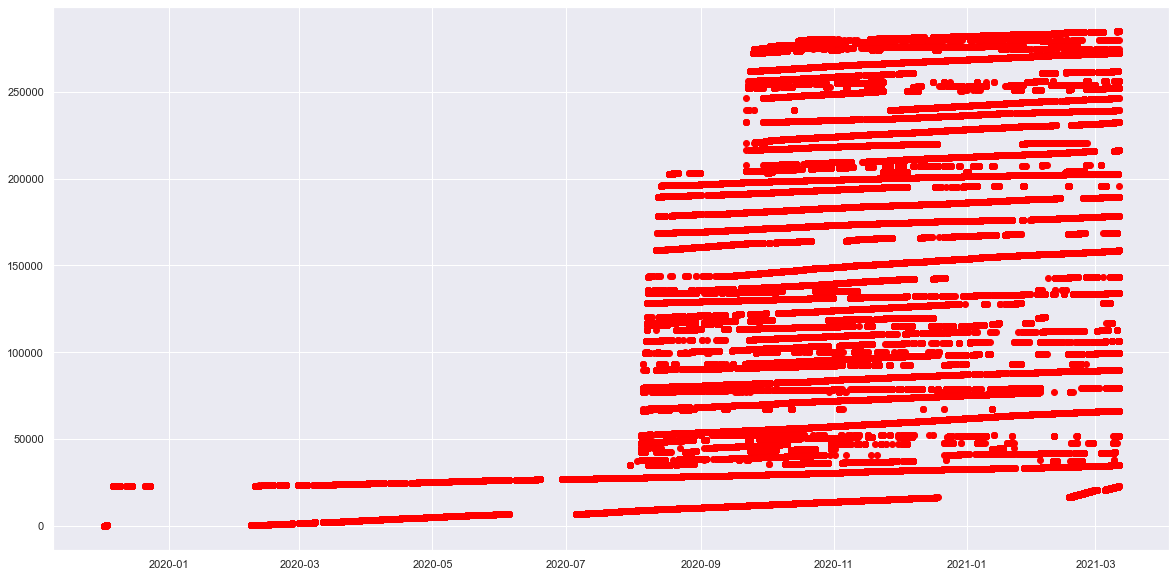

In [51]:
## How much of the observed behavior increases over time?
test_movement_detect = new_uplink[['client_time']]
test_movement_detect
fig, ax = plt.subplots(1, figsize=(20,10))
plt.scatter(test_movement_detect['client_time'], test_movement_detect.index, color='red')

It can be seen that more behaviors are observed over time. In particular, since August 2020, far more actions have begun to be observed than before.

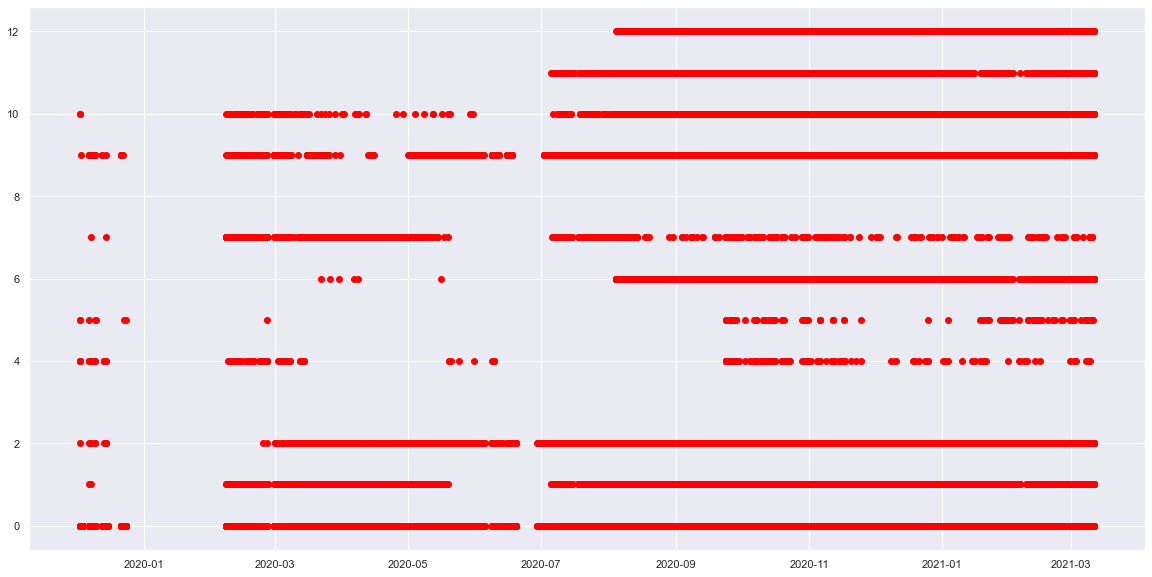

In [52]:
## As time goes by, what tag_IDs are usually taken?
test_time_tag_id = new_uplink[['client_time','tag_id']]
test_time_tag_id 
fig, ax = plt.subplots(1, figsize=(20,10))
plt.scatter(test_time_tag_id['client_time'], test_time_tag_id['tag_id'] , color='red')

In the case of tag 6 (medicine), 11 (window), and 12 (sink), it can be seen that it has been recorded a lot since August 2020. Tag 0 (No sensor), 1 (refrigerator), and 2 (toilet) are consistently recorded.

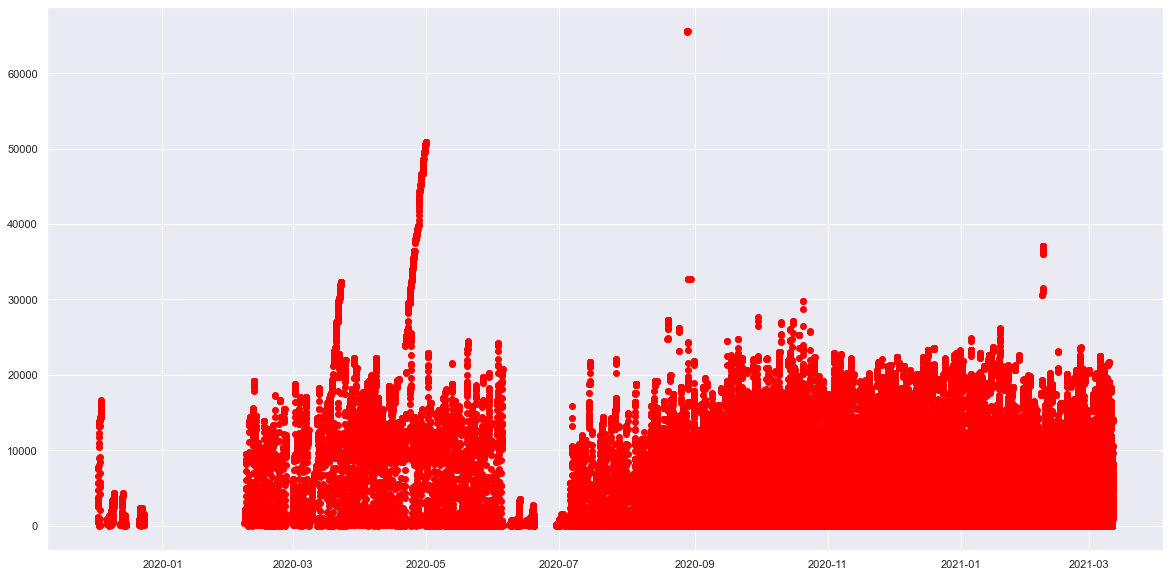

In [53]:
## What about the step change over time?
test_time_step = new_uplink[['client_time','step']]
test_time_step
fig, ax = plt.subplots(1, figsize=(20,10))
plt.scatter(test_time_step['client_time'], test_time_step['step'] , color='red')

#10000~25000 사이에서 찍힌다. 가끔 매우 많이 찍힌 곳이 보이긴 하지만, 두 곳의 interval 을 제외하면 비슷한 정도로 찍히고 있다. 

On average, it can be seen that records between 10000 and 25000 are taken. However, it is taken very often on a specific day, but it can be judged that the steps are relatively steady except for the two intervals.

#### 6-2. Visualize data by representing tagging information in a daily pattern

After preprocessing the data, now we have 11 tag_id (array([ 2, 10,  4,  0,  5,  9,  1,  7,  6, 11, 12])).

The information represented by each tag_id is as follows. (1: refrigerator, 2: toilet, 3: bathroom, 4: front door, 5: bedroom, 6: medicine, 7: water purifier, 8: remote controller, 9: kitchen, 10: microwave, 11: window, 12: sink, 13: fitness equipment, 14: desk, 15: living room, 16: vacuum cleaner, 17: washer)

Identifying the meaning of the tagsI matched the tag information to the expected daily routine of the user.

- ['Nothing'] 0: no sensor
- ['Housework'] 11: window, 12: sink, 16: vacuum cleaner, 17: washer
- ['Drink water'] 7: water purifier,
- ['Eating'] 9: kitchen, 10: microwave (Breakfast, Lunch, Dinner)
- ['Sleep'] 5: bedroom (Nap, Sleep)
- ['Toilet/washing'] 2: toilet, 3: bath room
- ['Taking medicine'] 6:Medicine
- ['Exercise'] 13: fitness equipment
- ['Study/day'] 14: desk
- ['Outing'] 4: Front door


In [54]:
ts = pd.Timestamp
def action_inference (tag, time,  dataset):
    action = 'Nothing'
    if((tag == 12) |  (tag == 11)):
        action = 'Housework'
        return action
    elif ((tag == 7)):
        action = 'Drink water'
        return action
    elif ((tag == 9)|(tag == 10)|(tag == 1)):
            if((ts(time).hour>=6) & (ts(time).hour<12)):
                action = 'Breakfast'
                return action
            elif((ts(time).hour>=12) & (ts(time).hour<15)):
                action = 'Lunch'
                return action
            elif((ts(time).hour>=15) & (ts(time).hour<18)):
                action = 'Snack'
                return action
            elif((ts(time).hour>=18) & (ts(time).hour<24)):
                action = 'Dinner'
                return action
            elif((ts(time).hour>=24) & (ts(time).hour<6)):
                action = 'Midnight snack'
                return action
    elif ((tag == 5)):
        if((ts(time).hour>=8) | (ts(time).hour<=20)):
            action = 'Nap'
            return action
        elif((ts(time).hour<8) | (ts(time).hour>20)):
            action = 'Sleep'
            return action
    elif ((tag == 2)):
        action = 'Toilet/washing'
        return action
    elif ((tag == 6)):
        action = 'Taking medicine'
        return action
    elif ((tag == 4)):
        action = 'Outing'
        return action
    else:
        return action

In [55]:
uplink_sample = new_uplink.reset_index(drop=True)

In [56]:
uplink_sample['pattern'] = ''
for i in range(len(uplink_sample)):
    uplink_sample['pattern'][i] = action_inference(uplink_sample['tag_id'][i],uplink_sample['client_time'][i],uplink_sample )

<ipython-input-56-263f69cebde2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uplink_sample['pattern'][i] = action_inference(uplink_sample['tag_id'][i],uplink_sample['client_time'][i],uplink_sample )


In [57]:
def time_inference (time,  dataset):
    ts = pd.Timestamp
    if((ts(time).hour>=6) & (ts(time).hour<12)):
        result = 'Morning'
        return result
    elif((ts(time).hour>=12) & (ts(time).hour<18)):
        action = 'Afternoon'
        return action
    elif((ts(time).hour>=18) & (ts(time).hour<24)):
        action = 'Night'
        return action
    elif((ts(time).hour>=24) & (ts(time).hour<6)):
        action = 'Midnight'
        return action
    
uplink_sample['time'] = ''
for i in range(len(uplink_sample)):
    uplink_sample['time'][i] = time_inference(uplink_sample['client_time'][i],uplink_sample )

<ipython-input-57-ee836f2a14ab>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uplink_sample['time'][i] = time_inference(uplink_sample['client_time'][i],uplink_sample )


In [58]:
uplink_sample

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low,age,sex,pattern,time
0,50795,230,2019-12-02 11:08:48,2,441,98,0,0,72,F,Toilet/washing,Morning
1,50802,230,2019-12-02 11:11:43,10,472,98,0,0,72,F,Breakfast,Morning
2,50810,230,2019-12-02 11:13:41,10,480,98,0,0,72,F,Breakfast,Morning
3,50812,230,2019-12-02 11:17:09,4,489,97,0,0,72,F,Outing,Morning
4,50815,230,2019-12-02 11:19:40,4,523,97,0,0,72,F,Outing,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
284776,3769733,672,2021-03-11 13:50:40,12,745,50,0,1,87,M,Housework,Afternoon
284777,3770449,672,2021-03-11 14:28:12,0,832,48,0,0,87,M,Nothing,Afternoon
284778,3770599,672,2021-03-11 14:38:13,0,841,47,0,0,87,M,Nothing,Afternoon
284779,3770901,672,2021-03-11 14:55:33,2,855,47,0,1,87,M,Toilet/washing,Afternoon


In [59]:
df1 = pd.get_dummies(uplink_sample['pattern']).reset_index(drop=True)
df1

,Breakfast,Dinner,Drink water,Housework,Lunch,Nap,Nothing,Outing,Snack,Taking medicine,Toilet/washing
0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
284776,0,0,0,1,0,0,0,0,0,0,0
284777,0,0,0,0,0,0,1,0,0,0,0
284778,0,0,0,0,0,0,1,0,0,0,0
284779,0,0,0,0,0,0,0,0,0,0,1


In [60]:
df2 = uplink_sample.drop(['uplink_id','tag_id','pattern'], axis=1).reset_index(drop=True)

In [61]:
df2

,owner_id,client_time,step,battery_low,is_charge,tag_battery_low,age,sex,time
0,230,2019-12-02 11:08:48,441,98,0,0,72,F,Morning
1,230,2019-12-02 11:11:43,472,98,0,0,72,F,Morning
2,230,2019-12-02 11:13:41,480,98,0,0,72,F,Morning
3,230,2019-12-02 11:17:09,489,97,0,0,72,F,Morning
4,230,2019-12-02 11:19:40,523,97,0,0,72,F,Morning
...,...,...,...,...,...,...,...,...,...
284776,672,2021-03-11 13:50:40,745,50,0,1,87,M,Afternoon
284777,672,2021-03-11 14:28:12,832,48,0,0,87,M,Afternoon
284778,672,2021-03-11 14:38:13,841,47,0,0,87,M,Afternoon
284779,672,2021-03-11 14:55:33,855,47,0,1,87,M,Afternoon


In [62]:
## merge df1 with df2
merge_df = pd.concat([df1, df2], axis=1)
merge_df

,Breakfast,Dinner,Drink water,Housework,Lunch,Nap,Nothing,Outing,Snack,Taking medicine,Toilet/washing,owner_id,client_time,step,battery_low,is_charge,tag_battery_low,age,sex,time
0,0,0,0,0,0,0,0,0,0,0,1,230,2019-12-02 11:08:48,441,98,0,0,72,F,Morning
1,1,0,0,0,0,0,0,0,0,0,0,230,2019-12-02 11:11:43,472,98,0,0,72,F,Morning
2,1,0,0,0,0,0,0,0,0,0,0,230,2019-12-02 11:13:41,480,98,0,0,72,F,Morning
3,0,0,0,0,0,0,0,1,0,0,0,230,2019-12-02 11:17:09,489,97,0,0,72,F,Morning
4,0,0,0,0,0,0,0,1,0,0,0,230,2019-12-02 11:19:40,523,97,0,0,72,F,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284776,0,0,0,1,0,0,0,0,0,0,0,672,2021-03-11 13:50:40,745,50,0,1,87,M,Afternoon
284777,0,0,0,0,0,0,1,0,0,0,0,672,2021-03-11 14:28:12,832,48,0,0,87,M,Afternoon
284778,0,0,0,0,0,0,1,0,0,0,0,672,2021-03-11 14:38:13,841,47,0,0,87,M,Afternoon
284779,0,0,0,0,0,0,0,0,0,0,1,672,2021-03-11 14:55:33,855,47,0,1,87,M,Afternoon


<AxesSubplot:>

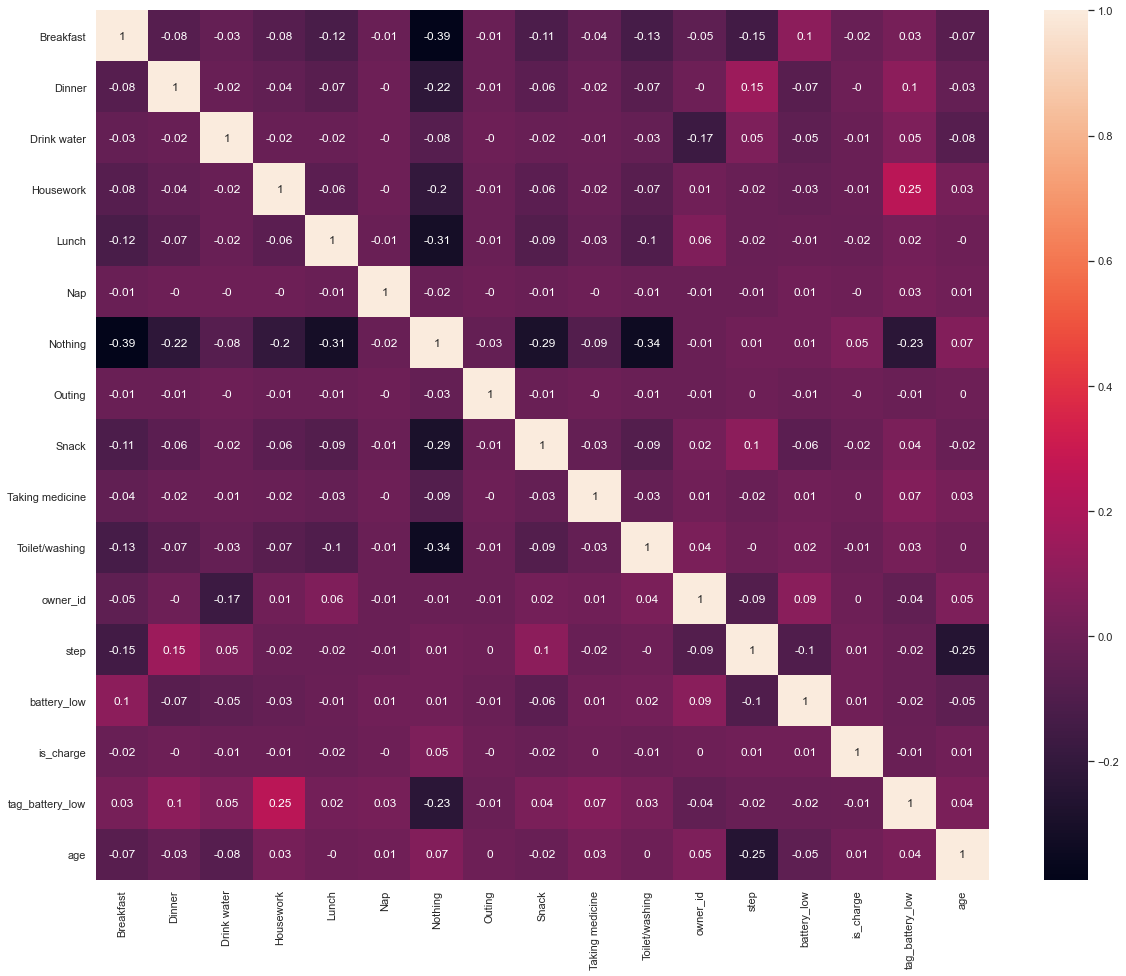

In [63]:
# Heatmap to show correlation between variables
fig, ax = plt.subplots(figsize=(20,16))
corr_matrix = merge_df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

If the correlation coefficient displayed on the heat map was between 0.1 and 0.3, it was considered a weak quantitative linear relationship, and if it was between -0.1 and -0.3, it was considered a weak negative linear relationship.

The correlation coefficient between Housework and tag_battery_low is 0.25, which can be seen as a quantitative linear relationship. In other words, when one of the variables Housework or tag_battery_low increases, the other variable tends to increase.

The correlation coefficient between Dinner and step is 0.15, which can be seen as a quantitative linear relationship. In addition, the correlation coefficient between Breakfast and step is -0.15, which can be seen as a negative linear relationship.

The correlation coefficient between step and age is -0.25, which can be seen as a negative linear relationship. In other words, when one of the step or age variables increases, the other variable tends to decrease.

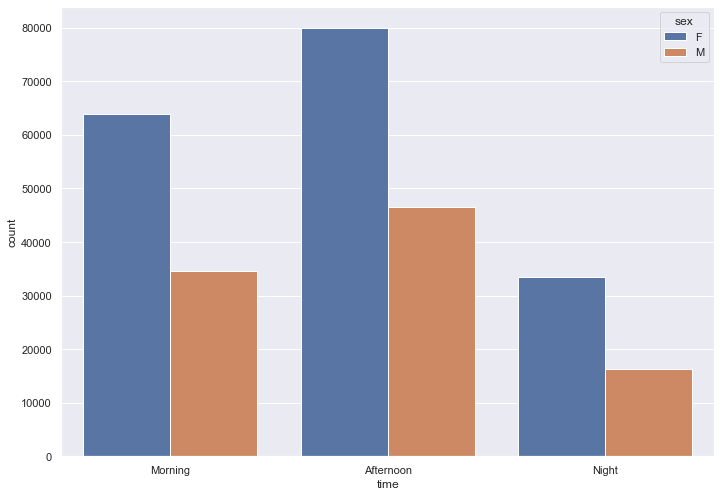

In [98]:
## What time zone do you do a lot of activities?
sns.countplot(x="time", hue="sex", data=uplink_sample);

It has the largest number of records during lunchtime. It can be assumed that they are most active during lunch time.

<AxesSubplot:xlabel='time', ylabel='age'>

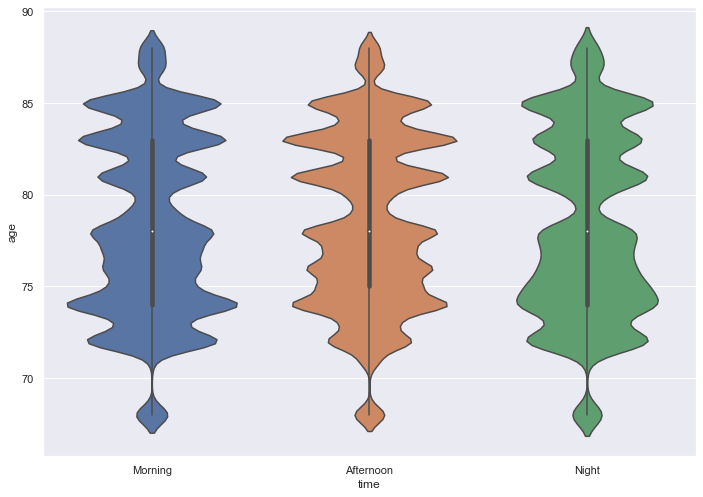

In [101]:
#Let's look at the relationship between time and age as a vilion plot.
sns.violinplot(x='time', y='age',data=uplink_sample)

All three graphs have similar shapes. There was nothing special in this relationship.

<AxesSubplot:xlabel='age', ylabel='step'>

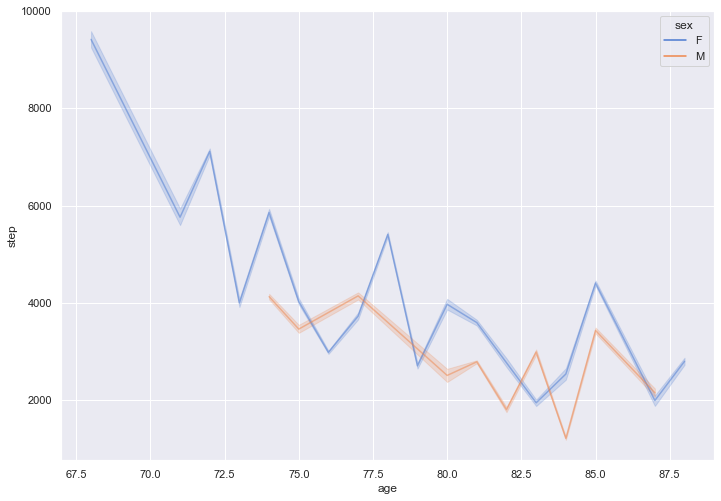

In [66]:
#Will the amount of steps decrease as you get older?
sns.lineplot(x="age", y="step", hue="sex",
            sizes=(40, 800), alpha=.5, palette="muted",
             data=merge_df)

It can be seen that the amount of steps decreases as you get older.

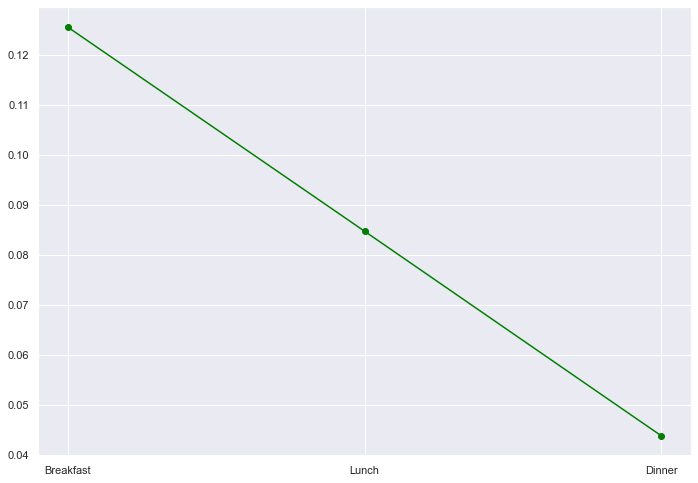

In [99]:
#Should they all eat breakfast, lunch, and dinner? Or what is the most regular meal?
eattime = ['Breakfast', 'Lunch', 'Dinner']
gdp = [merge_df['Breakfast'].mean(), merge_df['Lunch'].mean(), merge_df['Dinner'].mean()]
plt.plot(eattime, gdp, color = 'green', marker = 'o')

Of the total observed behaviors, breakfast, lunch, and dinner account for about 12 percent, about 8 percent, and about 4 percent, respectively. Therefore, it can be seen that more people eat breakfast than other meals. Dinner is not observed compared to other meals, so it can be said that there are many people who did not eat compared to other meals.

In [68]:
#So, are there differences between genders in terms of meals?

<AxesSubplot:xlabel='age', ylabel='Breakfast'>

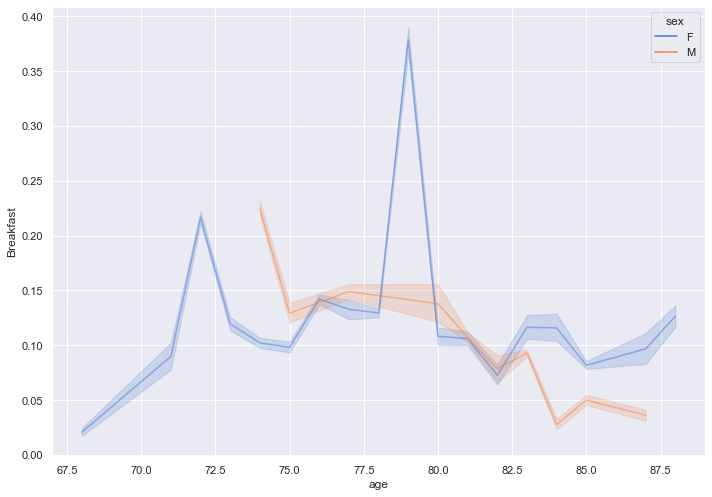

In [69]:
sns.lineplot(x="age", y="Breakfast", hue="sex",
            sizes=(40, 800), alpha=.5, palette="muted",
             data=merge_df)

Men tend not to eat breakfast as they get older.

<AxesSubplot:xlabel='age', ylabel='Lunch'>

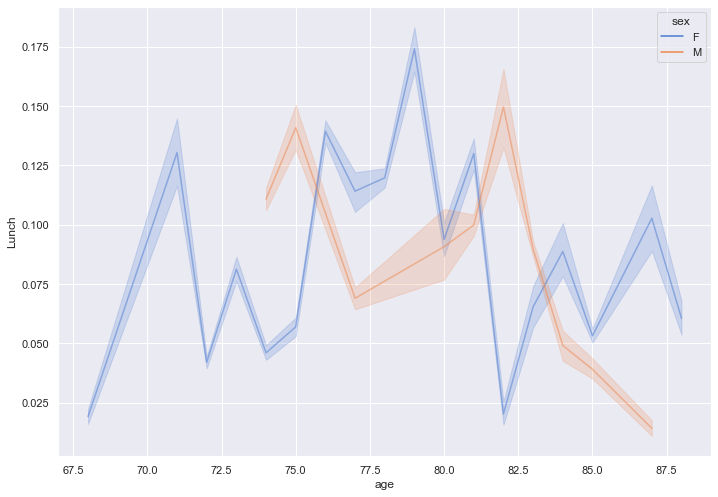

In [70]:
sns.lineplot(x="age", y="Lunch", hue="sex",
            sizes=(40, 800), alpha=.5, palette="muted",
             data=merge_df)

The tendency between age and lunch is not found.

<AxesSubplot:xlabel='age', ylabel='Dinner'>

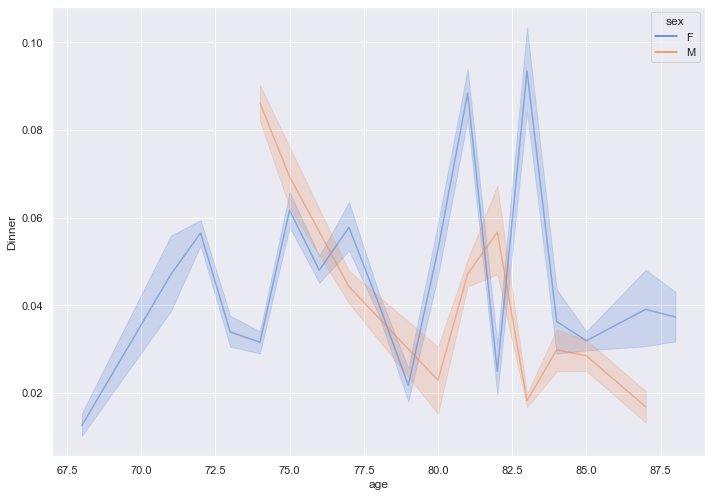

In [71]:
sns.lineplot(x="age", y="Dinner", hue="sex", alpha=.5, palette="muted",
             data=merge_df)

The tendency between age and dinner is not found.

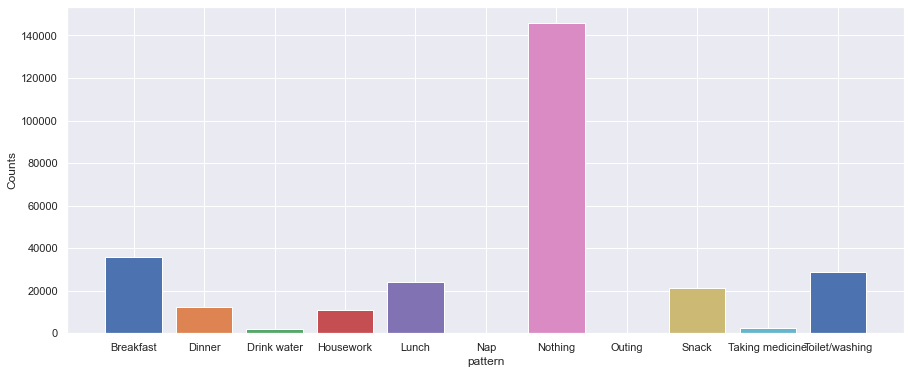

In [72]:
# Frequency of life pattern : COUNTS vs PATTERN 
palette = sns.color_palette(None, 11)
df = uplink_sample[['client_time','pattern']].groupby(['pattern']).count()
df

x = df['client_time'].index
y = df['client_time'].values

fig, ax = plt.subplots(1,figsize=(15, 6))
plt.bar(x, y, color = palette)
# Define labels
plt.xlabel("pattern")
plt.ylabel("Counts")
# Display plot
plt.show()

Through a simple barplot, each pattern showed the recorded count. Furthermore, the heat map below was drawn by adding information on gender.

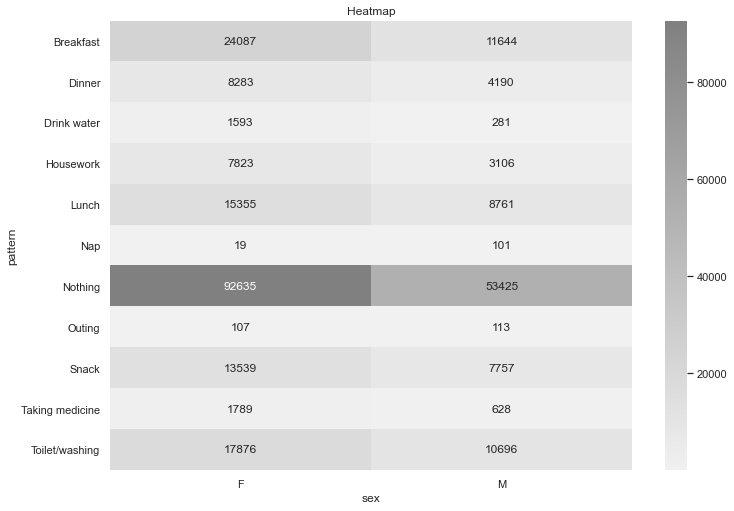

In [73]:
##How many life patterns are recorded according to sex?
#Heatmap : Pattern, sex, count
test_pattern_sex = uplink_sample.pivot_table(
    index="pattern", columns="sex", aggfunc="size")
test_pattern_sex
sns.heatmap(test_pattern_sex, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

<AxesSubplot:xlabel='pattern', ylabel='age'>

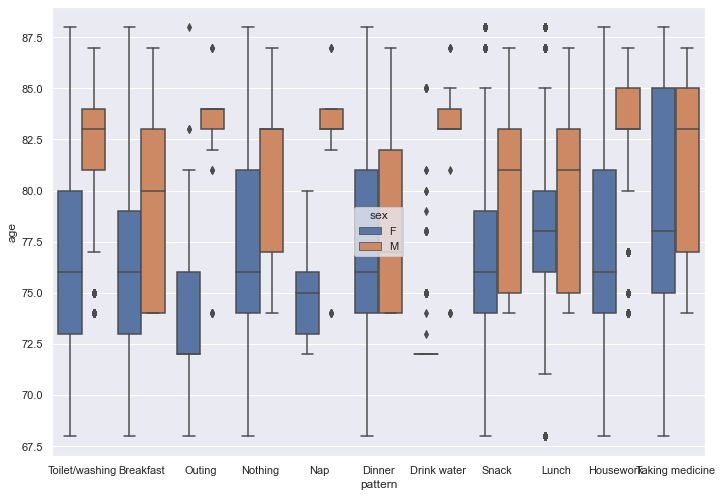

In [74]:
## What is the difference between age and pattern based on sex?
# boxplot : pattern age sex
sns.boxplot(x="pattern", y="age", hue="sex", data=uplink_sample)

We looked at the difference between age and pattern. In the case of Nap and Outing, it can be seen that it is a lifestyle pattern that does not appear well in older women. In addition, it can be seen that not many men have life patterns of Outing, Nap, and Drink Water.

<AxesSubplot:xlabel='pattern', ylabel='battery_low'>

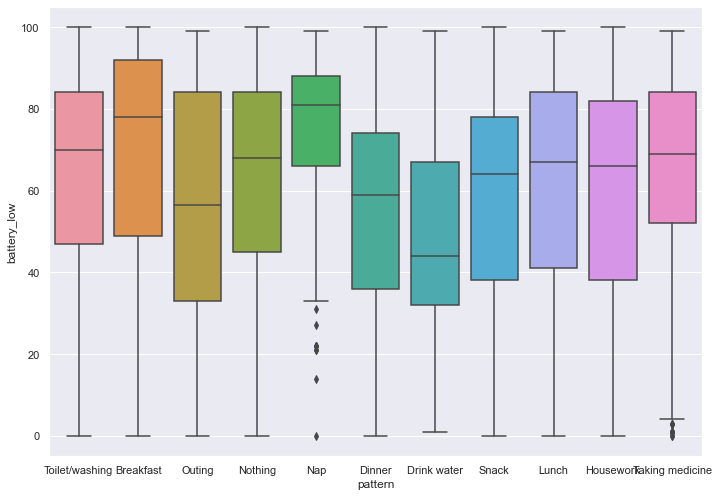

In [76]:
## What is the relationship between age and battery_low?
# Let's look at the relationship between the pattern and battery_low as a boxplot.
sns.boxplot(x='pattern', y='battery_low',data=uplink_sample)

when the user is active in Outing, Dinner, and Drink water, the average battery level below 60. Therefore, when this activity occurs, the battery level may be predicted to warn the user.

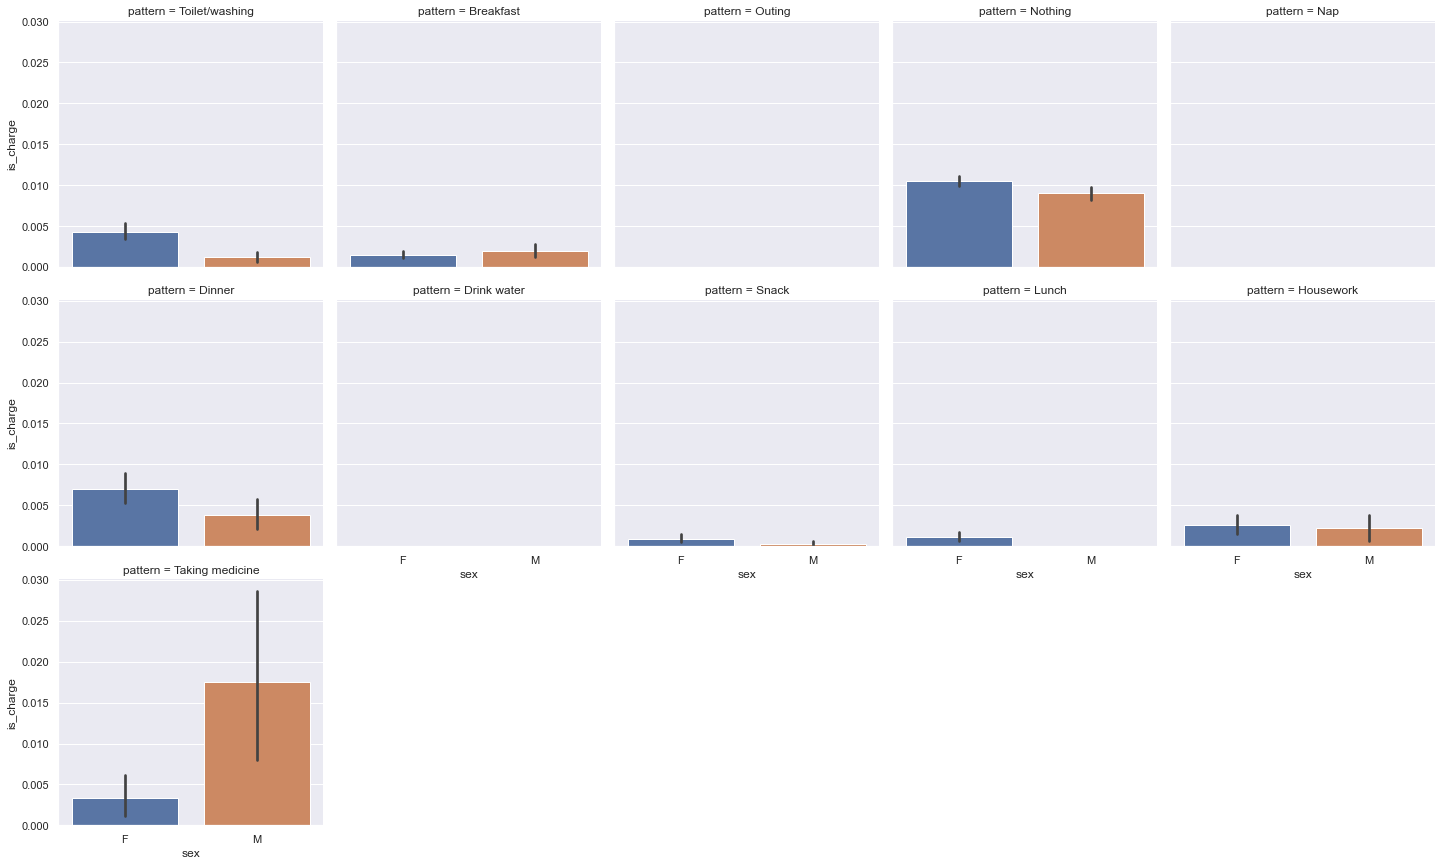

In [93]:
## For each life pattern, what is the relationship between gender and battery charging status?
sns.catplot(x="sex", y="is_charge",
                 col="pattern",col_wrap=5,
                data=uplink_sample, kind="bar",
                height=4);

In the case of female users, they tend to charge when they eat dinner. In the case of men, the tendency to charge the device when taking medicine is noticeable.

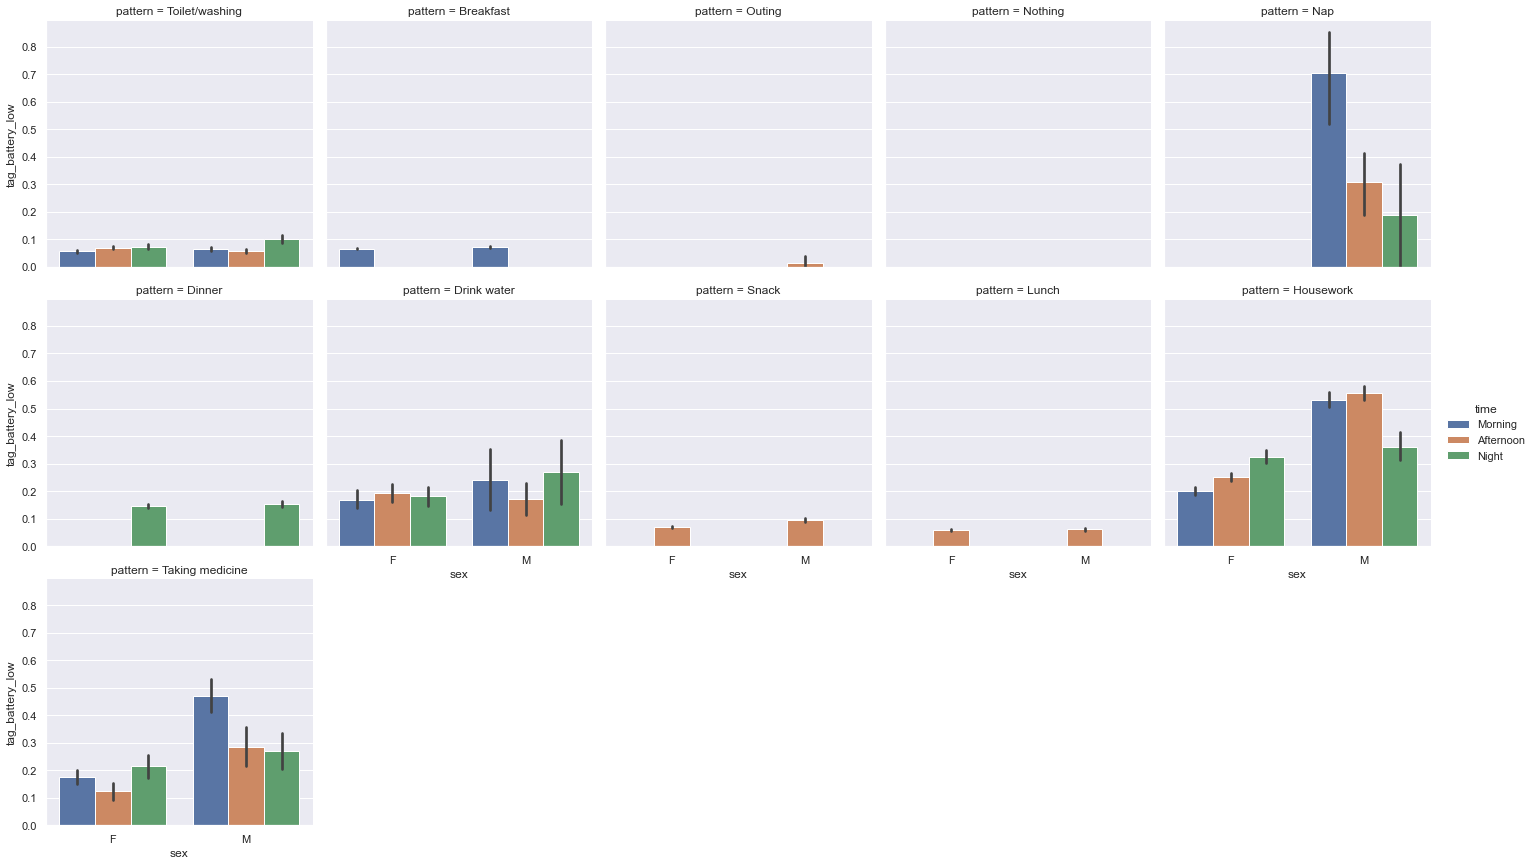

In [90]:
## For each life pattern, what is the relationship between gender and tag_battery_low?
sns.catplot(x="sex", y="tag_battery_low", hue='time', 
                 col="pattern",col_wrap=5,
                data=uplink_sample, kind="bar",
                height=4);

Women maintain a good balance of tag battery life in all life patterns (except house work). However, in the case of men, there is a wide gap in tag battery life, such as house work and nap. Therefore, greater attention should be paid to device management.

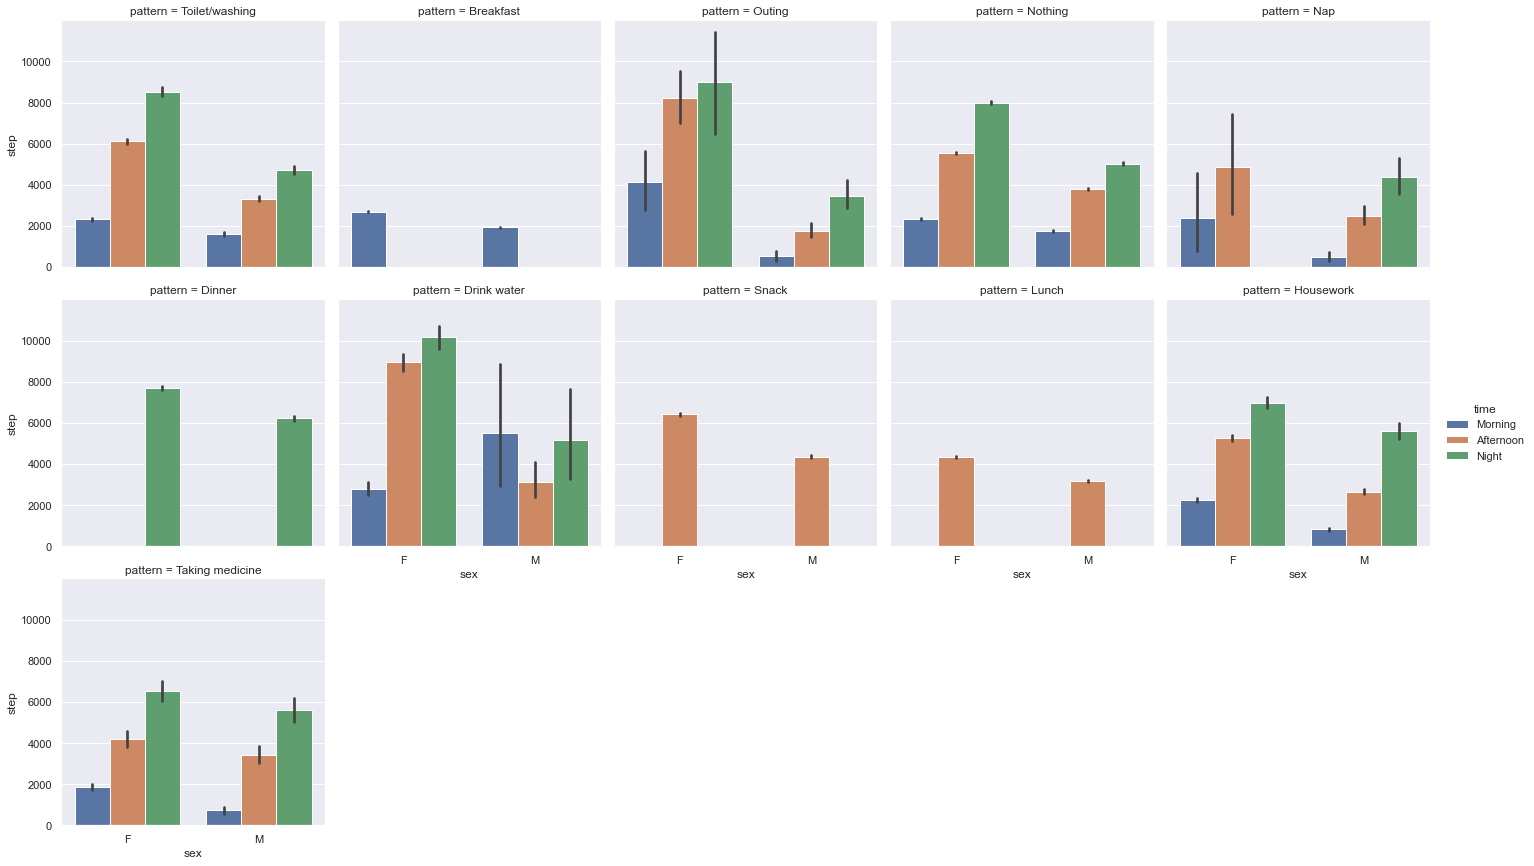

In [91]:
## For each life pattern, what is the relationship between gender and step?
sns.catplot(x="sex", y="step",
                col="pattern", hue='time', col_wrap=5,
                data=uplink_sample, kind="bar",
                height=4);

Sex, life pattern, and number of steps were compared. In the case of women, they tend to walk more when they eat dinner or go outside. However, for men, the overall number of steps is consistently low except for dinner.

## Q. Visualize lifelogging patterns for each user from the preprocessed data. Do you agree that it is possible to make a new service based on various patterns you discover over data? If possible do you need any additional information to develop your idea?

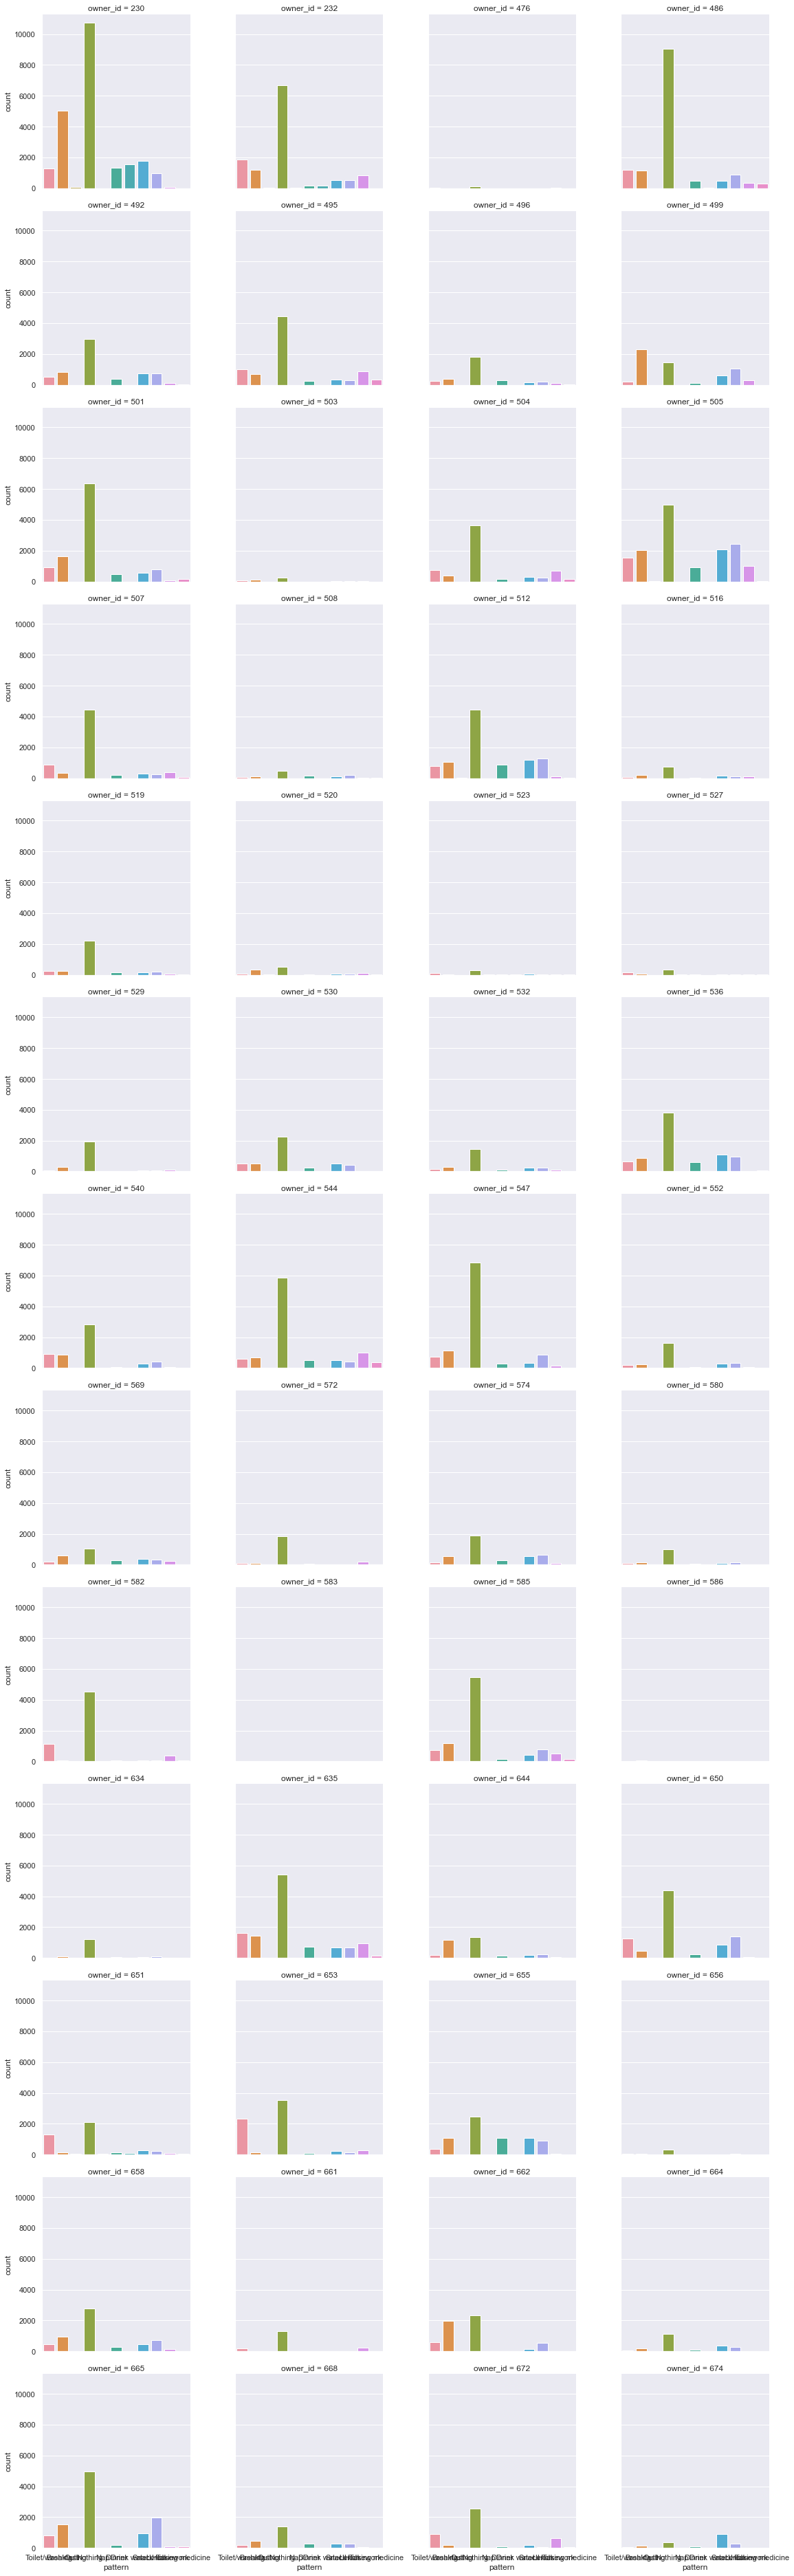

In [97]:
## Visualize lifelogging patterns for "**each user**" from the preprocessed data 
sns.catplot(x="pattern", col="owner_id", col_wrap=4,
                data=uplink_sample, kind="count",
                height=4);

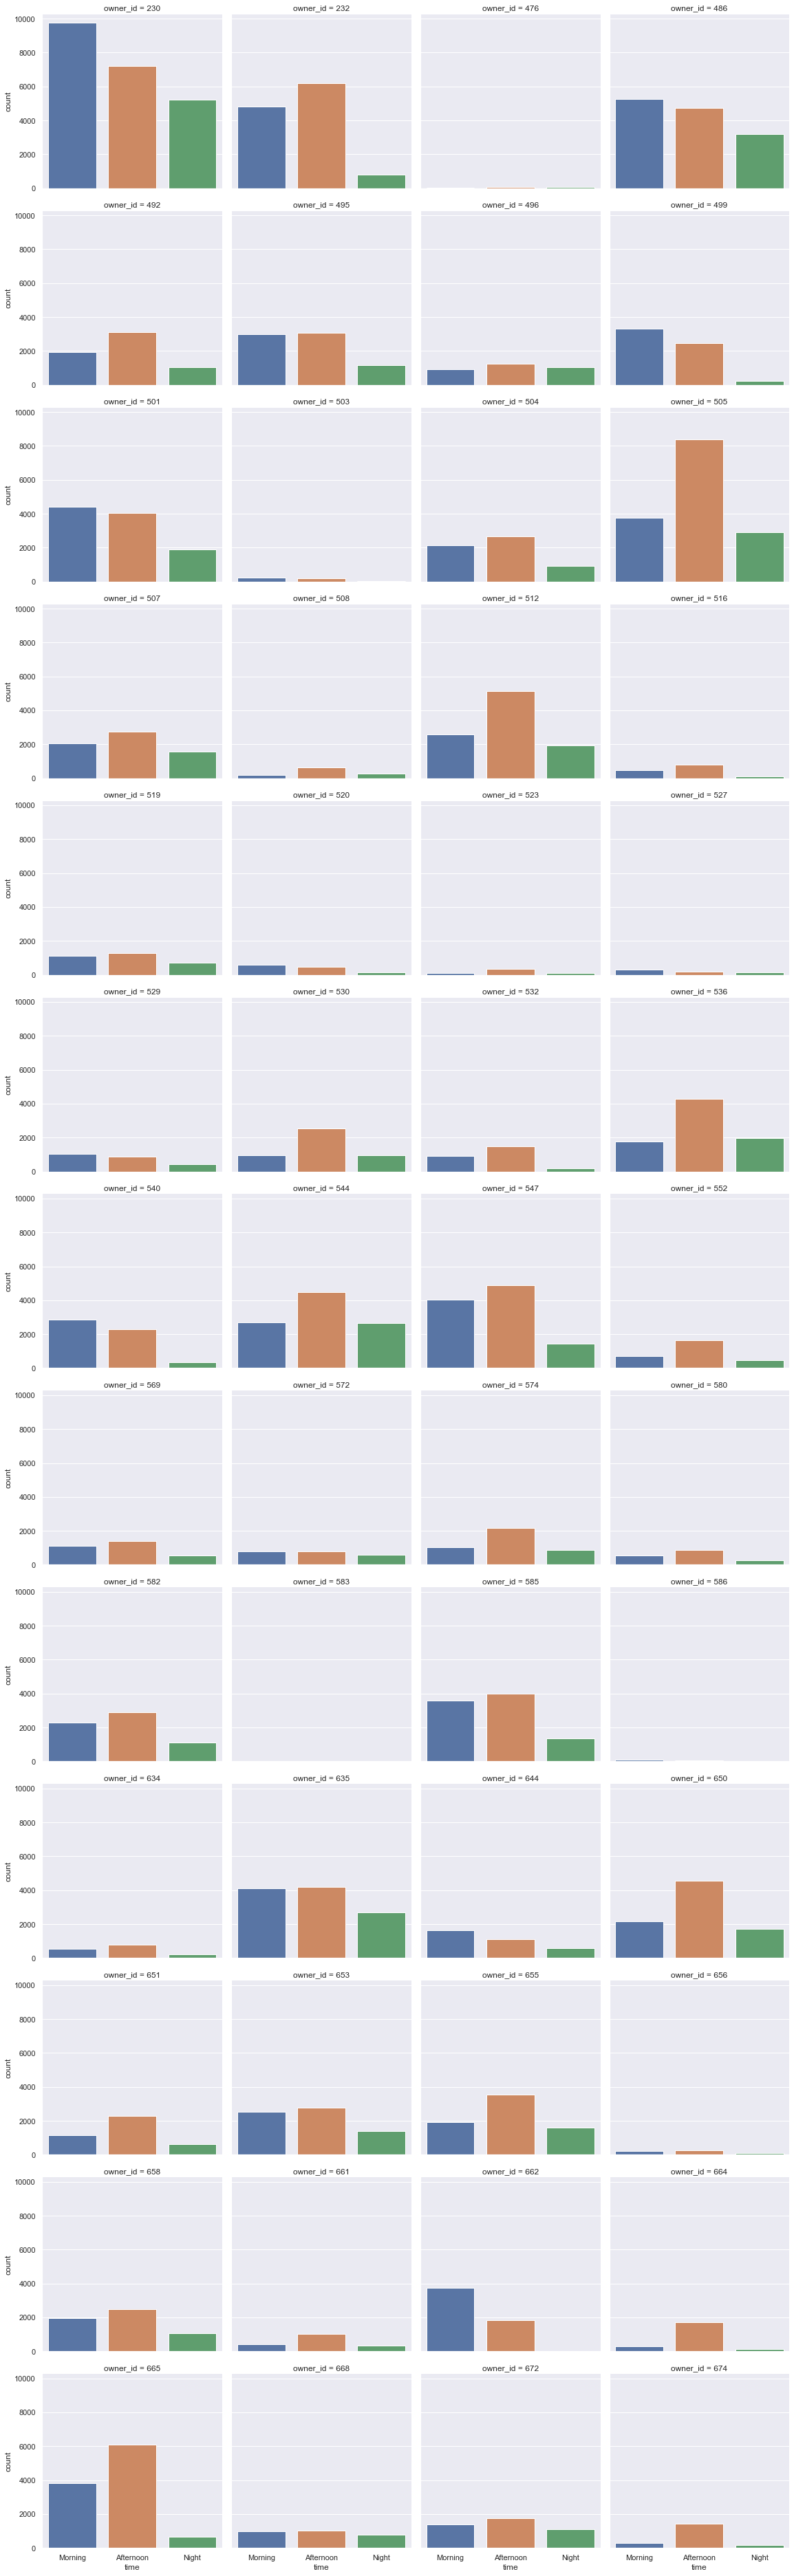

In [96]:
## Visualize lifelogging patterns for "each user" from the preprocessed data : time & pattern 
sns.catplot(x="time", col="owner_id", col_wrap=4,
                data=uplink_sample, kind="count",
                height=4);

#### 7-1. Do you agree that it is possible to make a new service based on various patterns you discover over data?

1. It can be seen that the amount of steps decreases as you get older.(correlation coefficient between step and age is -0.25) In consideration of this, it is possible to provide a service that recommends step exercise for each age.


2. It was found that many people eat breakfast compared to lunch and dinner. Accordingly, it is possible to provide a service for operating the kitchen system in advance when the morning comes.


3. It can be seen that napping and going out are not often seen in older women and are often seen in younger women. Accordingly, when the user is a woman of low age, it is predicted that there are many life patterns of napping and going out, and related alarms may be activated. In addition, it can be seen that there are not many men who have a lifestyle pattern of going out, taking a nap, and drinking water compared to women. In particular, drinking water is a healthy lifestyle, so you can also create a service that sends an alarm to drink water before and after meals.


4. The battery level of the device is likely to be low when the user goes out, eats dinner, or drinks water, so it is possible to send a warning service to the user to charge the device when the above activity occurs.


5. In particular, female users tend to charge when they eat dinner. Therefore, if charging is not performed before or after dinner, a warning service for charging can be sent. In the case of men, the tendency to charge the device when taking medicine is noticeable. Therefore, if charging is not carried out before or after taking the drug, a warning service for charging can be sent.


6. Women maintain a good balance of tag battery life in all life patterns (except house work). However, in the case of men, it was found that the gap in tag battery life was large. Therefore, if the user is male, it is necessary to provide services that frequently send device battery and life management alarms so that greater attention can be paid to device management.

#### 7-2. If possible do you need any additional information to develop your idea?

Yes. It is possible to create a service based on user patterns, but it will not be sophisticated.

New service may be provided based on the age and gender of the user using the given data, but unfortunately currently provided data alone is insufficient, because  with these number of users, **it was difficult to generalize to the entire user and derive significant analysis results for all users.** It is necessary to have at least information about users recorded in `uplink` to make more accurate predictions. Only 52 users have information such as gender, birth year, and age, so the number is too small to analyze and generalize life patterns through this. Therefore, in order to create a precise service, **more information about the user should be provided.**